**Name: Arwaz Khan**

**Roll No.: 242210005**

**Date: 21/01/2025**

# **Web Scraping**

**Problem Statement:** Your task is to extract data from an online bookstore to analyse the available books based on their categories, ratings, prices, and availability. You aim to scrape the required data from the website and perform basic data analysis.

**Website for Scraping:** Use the publicly available website https://books.toscrape.com/. The site contains various books across multiple categories with details like title, price, rating, and stock status.

Tasks in order:
1. **Scrape Book Information:** Navigate to the website and extract data for all books available. For each book, extract the following details:
 * Title
 * Price
 * Rating (e.g., 1-star, 2-star, etc.)
 * Availability (In stock or Out of stock)
2. **Organize the Data:** Store the extracted data in a structured format such as a CSV file or a Pandas DataFrame.
3. **Categorize the Data:** Identify the category of each book and include it in your data.
4. **Basic Analysis:**
  * Calculate the average price of books in each category.
  * Find the most frequent rating for books.
  * Identify the category with the highest number of books available.
5. Create a visualization plot showing the number of books per category.

In [69]:
# Import Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [70]:
# Define helper function
BASE_URL = "https://books.toscrape.com/"

def get_soup(url):
    """Fetch a webpage and return a BeautifulSoup object."""
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.content, "html.parser")
    else:
        print(f"Failed to fetch page: {url}")
        return None

def extract_book_data(soup):
    """Extract book data from a single page."""
    books = []
    for book in soup.find_all('article', class_='product_pod'):
        # Book details
        title = book.h3.a['title']
        price = float(book.find('p', class_='price_color').text[1:])
        rating = book.p['class'][1]  # e.g., "One", "Two"
        availability = book.find('p', class_='instock availability').text.strip()

        # Navigate to the book's page to fetch the category
        book_url = BASE_URL + "catalogue/" + book.h3.a['href']
        book_soup = get_soup(book_url)
        category = get_category(book_soup) if book_soup else "Unknown"

        books.append({
            'Title': title,
            'Price': price,
            'Rating': rating,
            'Availability': availability,
            'Category': category
        })
    return books

def get_category(soup):
    """Extract category of books from the current page."""
    breadcrumb = soup.find('ul', class_='breadcrumb')
    if breadcrumb:
        breadcrumb_items = breadcrumb.find_all('li')
        if len(breadcrumb_items) > 2:
            return breadcrumb_items[2].text.strip()
    return "Unknown"


def scrape_books():
    """Scrape all book data from the website."""
    all_books = []
    page_url = BASE_URL + 'catalogue/page-1.html'  # Starting page

    while page_url:
        soup = get_soup(page_url)
        if not soup:
            break

        books = extract_book_data(soup)  # Now fetches category from the book's page
        all_books.extend(books)

        # Check for next page
        next_page = soup.find('li', class_='next')
        if next_page:
            next_page_url = next_page.a['href']
            page_url = BASE_URL + 'catalogue/' + next_page_url
        else:
            page_url = None

    return pd.DataFrame(all_books)

In [71]:
# Scrape Data
print("Scraping book data...")
books_df = scrape_books()

Scraping book data...


In [72]:
# Save Data to CSV
print("Saving data to CSV...")
books_df.to_csv('books_data.csv', index=False)
books_df.head()  # Display the first few rows of the data

Saving data to CSV...


,Title,Price,Rating,Availability,Category
0,A Light in the Attic,51.77,Three,In stock,Poetry
1,Tipping the Velvet,53.74,One,In stock,Historical Fiction
2,Soumission,50.10,One,In stock,Fiction
3,Sharp Objects,47.82,Four,In stock,Mystery
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock,History


In [73]:
# Perform Data Analysis
print("Analyzing data...")

# Average price per category
average_price = books_df.groupby('Category')['Price'].mean()
print("\nAverage price per category:")
print(average_price)

# Most frequent rating
most_frequent_rating = books_df['Rating'].mode()[0]
print("\nMost frequent rating:")
print(most_frequent_rating)

# Category with the most books
most_books_category = books_df['Category'].value_counts().idxmax()
print("\nCategory with the most books:")
print(most_books_category)

Analyzing data...

Average price per category:
Category
Academic              13.120000
Add a comment         35.796418
Adult Fiction         15.360000
Art                   38.520000
Autobiography         37.053333
Biography             33.662000
Business              32.460000
Childrens             32.638276
Christian             42.496667
Christian Fiction     34.385000
Classics              36.545263
Contemporary          36.200000
Crime                 10.970000
Cultural              36.580000
Default               34.392697
Erotica               19.190000
Fantasy               39.593958
Fiction               36.066615
Food and Drink        31.414667
Health                51.452500
Historical            22.830000
Historical Fiction    33.644231
History               37.295000
Horror                35.949412
Humor                 33.501000
Music                 35.636923
Mystery               31.719062
New Adult             46.383333
Nonfiction            34.260182
Novels          

Visualizing data...


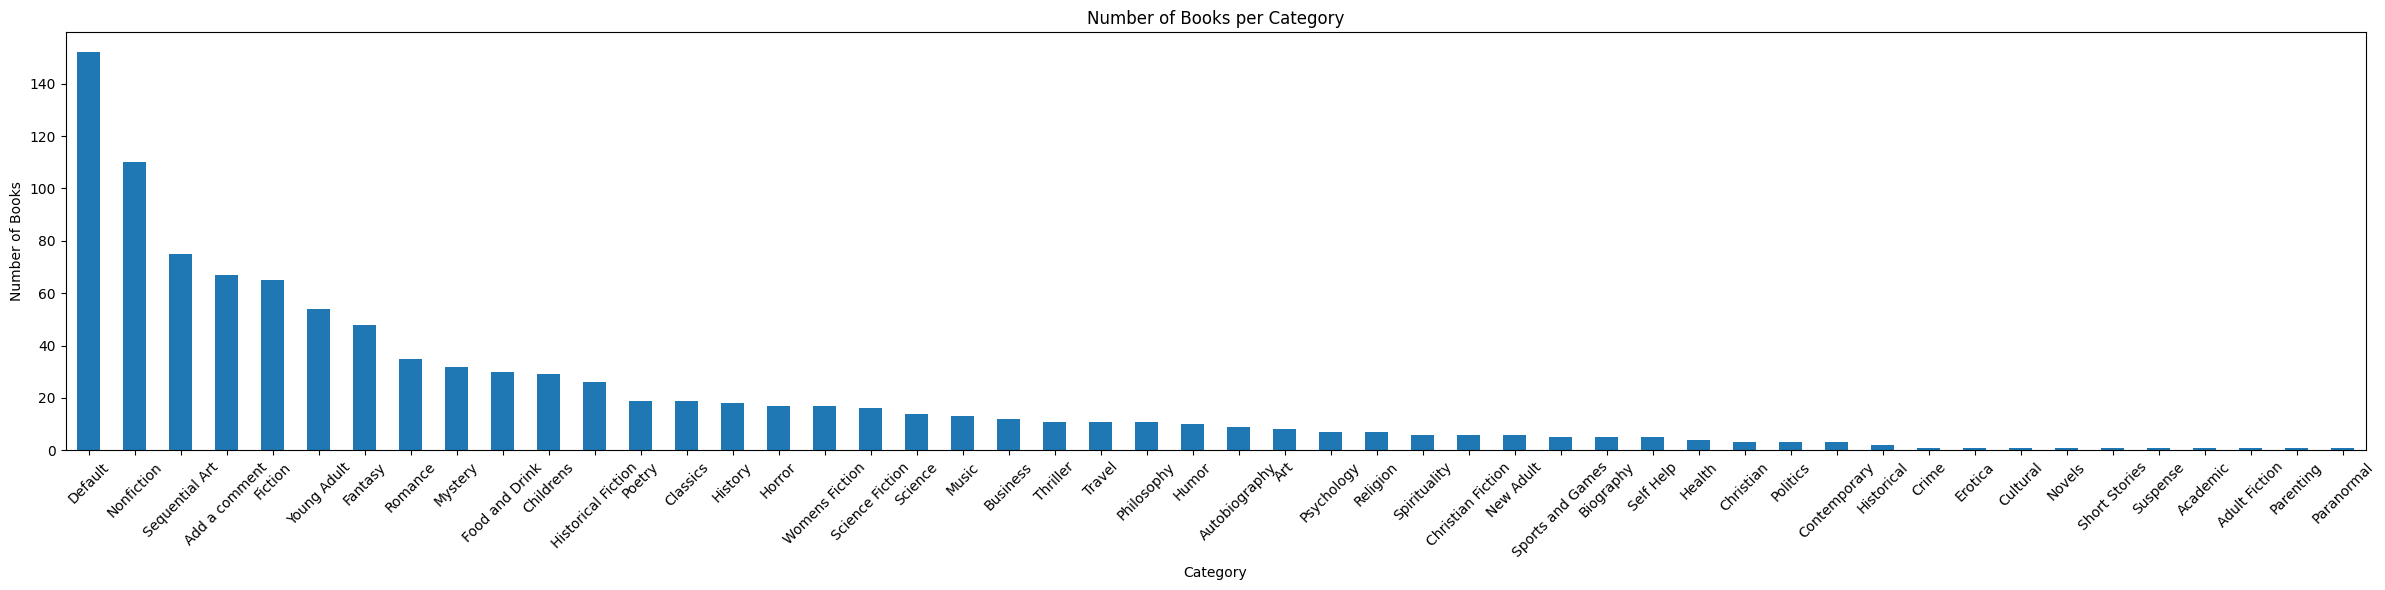

In [76]:
# Visualize Data
print("Visualizing data...")

# Bar plot for the number of books per category
category_counts = books_df['Category'].value_counts()
category_counts.plot(kind='bar', figsize=(24,6))
plt.title('Number of Books per Category')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
# Download the CSV File
files.download('books_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>